# First: only with post db
Import the data

In [5]:
import pandas as pd 
import numpy as np 

import statsmodels
import statsmodels.api as sm
import scipy.stats as stats

import matplotlib.pyplot as plt

# import the csv file with JUST the politicians post
postDB = pd.read_csv(r"/Users/tassan-mazzoccoarthur/Desktop/NETWORK SCIENCE (MOD. B)/1_Project/database/postDB.csv", engine='python')

df_post = pd.DataFrame(data=postDB)
df_post

,Unnamed: 0,Origin_file_order,Site,p_id,dateCreated,p_politician,p_gender,p_GRUPPO_PE,p_LISTA,p_PARTITO,...,p_SemiC,p_Qmark,p_Exclam,p_Dash,p_Quote,p_Apostro,p_Parenth,p_OtherP,Count,target1_2
0,0,30126,FB,96844400700_10157493758850701,2019-04-23T10:33:37Z,MARCELLO GEMMATO,M,PPE,FDI,FDI,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,NaN
1,15,53320,FB,911961728894076_2169530686470501,2019-04-17T12:50:26Z,IGOR GELARDA,M,EFDD,LEGA,Lega,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,NaN
2,16,78041,FB,667483386685540_1869411966492670,2019-05-21T15:13:32Z,SILVIA SERAFINA DETTA NARDONE SARDONE,F,EFDD,LEGA,Lega,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,NaN
3,17,229,FB,667483386685540_1844118159022051,2019-05-05T08:53:55Z,SILVIA SERAFINA DETTA NARDONE SARDONE,F,EFDD,LEGA,Lega,...,0.0,0.00,0.00,0.00,19.35,0.00,6.45,0.00,1,NaN
4,20,17457,FB,667483386685540_1835929416507592,2019-04-29T15:12:05Z,SILVIA SERAFINA DETTA NARDONE SARDONE,F,EFDD,LEGA,Lega,...,0.0,0.00,0.47,0.23,0.93,0.93,11.19,0.93,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10098,77924,41072,Twitter,1.11772429491684E+018,2019-04-15T09:40:12Z,ANTONIO TAJANI,M,PPE,FI,FI,...,0.0,0.00,0.00,0.00,0.00,0.00,12.50,31.25,1,NaN
10099,77928,43438,Twitter,1.11771528814812E+018,2019-04-15T09:04:25Z,DAVID SASSOLI,M,PSE,Siamo Europei,PD,...,0.0,2.08,2.08,0.00,0.00,6.25,0.00,0.00,1,NaN
10100,77963,79121,FB,56413702888_10157226250102889,2019-05-18T15:50:12Z,DANIELA SANTANCHÉ,F,PPE,FDI,FDI,...,0.0,12.24,12.24,0.00,0.00,4.08,0.00,4.08,1,NaN
10101,77993,80527,FB,252306033154_10156588128813155,2019-05-04T14:46:05Z,MATTEO SALVINI,M,EFDD,LEGA,Lega,...,0.0,1.75,1.75,0.00,3.51,1.75,3.51,10.53,1,NaN


Create the matrix

In [77]:
#GETTING HAND ON THE DATAFRAME
size_df= len(df_post)
print("num of posts:", size_df)

#find all parties
parties=df_post['p_PARTITO'].unique().tolist()
print("num of parties=",len(parties))
#print(parties) #type=list

#find all politicians
pol=df_post['p_politician'].unique().tolist()
print("num of pol=",len(pol))
#print(pol)

#find index of a given politician
a=pol.index("IGOR GELARDA")
#print(a)

#CREATE MATRIX
#Matrix shape= root/party/party.....pol/pol/pol/...../post/post
total_size=1+len(parties)+len(pol)+size_df
shift_size=1+len(parties)+len(pol)
#matrix = np.zeros((total_size,total_size),dtype=int)
matrix = np.identity(total_size,dtype=int)
for i in range(size_df):
    #for each post with have to add 1 to the link party-politician and 1 to the link politician-post
    index_party=parties.index(df_post['p_PARTITO'][i])+1 #add 1 for the root element
    index_pol=pol.index(df_post['p_politician'][i])+1+len(parties) #add 
    #print("index_party=", index_party)
    #print("index_pol=", index_pol)

    #BE CAREFUL: ONLY 1 HALF OF THE MATRIX IS FILLED
    matrix[0][index_party]+=1 #add 1 to link root-party
    matrix[index_party][index_pol]+=1 #add 1 to the link party-politician
    matrix[index_pol][i+shift_size]+=1 #1 to the link politician-post
    #now we fill the other half (lower-left one)
    matrix[index_party][0]+=1
    matrix[index_pol][index_party]+=1
    matrix[i+shift_size][index_pol]+=1



num of posts: 10103
num of parties= 9
num of pol= 77


In [ ]:
#Some checks:
'''
#print(matrix[matrix>10])
#print(matrix)
#np.set_printoptions(threshold=5)
#print(len(matrix[5,:]))

print("*** 5 first col ***")
for i in range(5):
    for j in range(100):
        print(matrix[i][j], end=' ')
    print("")

print("*** values > 0")
print(matrix[matrix>0])
print(len(matrix[matrix>0]))'''

In [71]:
#transform the numpe.array into a numpy.matrix (in order to create the networkx graph)
m=np.asmatrix(matrix)
print(type(m))
print(m.ndim)

<class 'numpy.matrix'>
2


In [72]:
import networkx as nx
#First let's try with a small matrix
m_trunc=m[:20,:20]
np.set_printoptions(linewidth=200)
print(m_trunc)
G_trunc = nx.from_numpy_matrix(m_trunc)

[[   1 1589 2335  942  482  286  313 2496 1252  408    0    0    0    0    0    0    0    0    0    0]
 [1589    1    0    0    0    0    0    0    0    0   47    0    0  407    0    0    0    0    0  540]
 [2335    0    1    0    0    0    0    0    0    0    0  120  286    0    0    0   88    0    0    0]
 [ 942    0    0    1    0    0    0    0    0    0    0    0    0    0  179  241    0    0    0    0]
 [ 482    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0   70    0    0]
 [ 286    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0   96    0]
 [ 313    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [2496    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0]
 [1252    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0]
 [ 408    0    0    0    0    0    0    0    0    1    0    0    0    0  

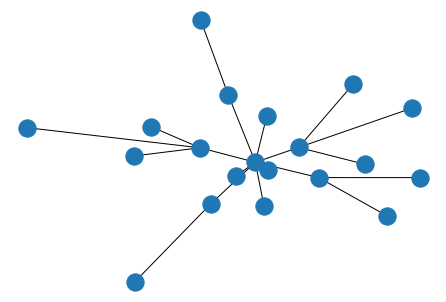

In [75]:
nx.draw(G_trunc)
plt.show()

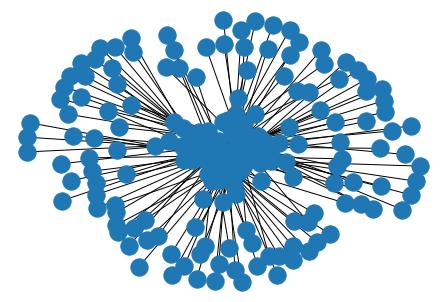

In [33]:
#Now let's try with a bigger matrix
m_test=m[:200,:200]
G_test = nx.from_numpy_matrix(m_test)
nx.draw(G_test)
plt.show()

In [45]:
#Export the real graph
G = nx.from_numpy_matrix(m)
nx.write_graphml(G, "test_networkx_export.graphml")  

And we get from gephi:

<img src="gephi_graph.png">

# Things to fix

In [43]:
#are labels still there?
G_trunc.edges(data=True)

EdgeDataView([(0, 0, {'weight': 1}), (0, 1, {'weight': 1589}), (0, 2, {'weight': 2335}), (0, 3, {'weight': 942}), (0, 4, {'weight': 482}), (0, 5, {'weight': 286}), (0, 6, {'weight': 313}), (0, 7, {'weight': 2496}), (0, 8, {'weight': 1252}), (0, 9, {'weight': 408}), (1, 1, {'weight': 1}), (1, 10, {'weight': 47}), (1, 13, {'weight': 407}), (1, 19, {'weight': 540}), (2, 2, {'weight': 1}), (2, 11, {'weight': 120}), (2, 12, {'weight': 286}), (2, 16, {'weight': 88}), (3, 3, {'weight': 1}), (3, 14, {'weight': 179}), (3, 15, {'weight': 241}), (4, 4, {'weight': 1}), (4, 17, {'weight': 70}), (5, 5, {'weight': 1}), (5, 18, {'weight': 96}), (6, 6, {'weight': 1}), (7, 7, {'weight': 1}), (8, 8, {'weight': 1}), (9, 9, {'weight': 1}), (10, 10, {'weight': 1}), (11, 11, {'weight': 1}), (12, 12, {'weight': 1}), (13, 13, {'weight': 1}), (14, 14, {'weight': 1}), (15, 15, {'weight': 1}), (16, 16, {'weight': 1}), (17, 17, {'weight': 1}), (18, 18, {'weight': 1}), (19, 19, {'weight': 1})])

In [ ]:
#TODO: CREATE 2 DIFFERENT FILES: NODE AND EDGES
#TODO: add labels and weight to export
#TODO: how to include all datas from dataframe into the graph?

# Some check

In [48]:
#matrix symmetry
print((m.transpose() == m).all())

True


In [65]:
#check number of values on first row
first_row=m[0,:] #type numpy.matrix
first_row = np.squeeze(np.asarray(first_row)) #type array
sum(filter(lambda x: x>0, first_row))
#10104 is good! (posts+root)

10104

In [66]:
#check number of values on first col
first_col=m[:,0] #type numpy.matrix
first_col = np.squeeze(np.asarray(first_col)) #type array
sum(filter(lambda x: x>0, first_col))
#10104 is good! (posts+root)

10104